In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [2]:
#Importing MNIST dataset from tensorflow keras
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()

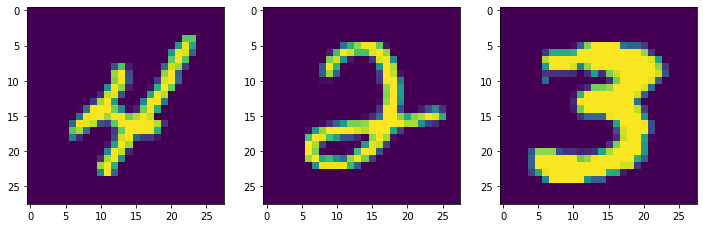

In [3]:
#Plotting certain images from the dataset
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].imshow(trainval_x[9])
axes[1].imshow(trainval_x[16])
axes[2].imshow(trainval_x[27])
plt.show()

In [4]:
#Converting the data from utf-8 format to float format
trainval_x = np.float32(trainval_x)
trainval_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
#Converting the test data from utf-8 format to float format
test_x = np.float32(test_x)
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
#Creating a validation set from the train dataset
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(trainval_x, trainval_y, test_size = 0.2, random_state = 42)
train_x.shape, val_x.shape, test_x.shape, train_y.shape, val_y.shape, test_y.shape

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000,),
 (12000,),
 (10000,))

In [7]:
#Creating a neural network model with 2 dense layers
nn_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape = (28,28)),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

In [8]:
#Compiling the model
nn_model.compile(optimizer='adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Fitting the model over the data and storing the loss and accuracy values
history = nn_model.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y))

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 4.8046 - accuracy: 0.5842 - val_loss: 0.5582 - val_accuracy: 0.8622
Epoch 2/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4954 - accuracy: 0.8737 - val_loss: 0.4469 - val_accuracy: 0.8902
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4113 - accuracy: 0.8974 - val_loss: 0.3733 - val_accuracy: 0.9141
Epoch 4/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3703 - accuracy: 0.9115 - val_loss: 0.4111 - val_accuracy: 0.9025
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3343 - accuracy: 0.9160 - val_loss: 0.3637 - val_accuracy: 0.9121
Epoch 6/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3252 - accuracy: 0.9167 - val_loss: 0.3452 - val_accuracy: 0.9153
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2976 - accuracy: 0.9221 - val_loss: 0.3436 - val_ac

In [10]:
#Printing the values loss and accuracy values of train and validation dataset
history.history

{'accuracy': [0.7246458530426025,
  0.879562497138977,
  0.8976874947547913,
  0.9079166650772095,
  0.9138333201408386,
  0.9176041483879089,
  0.9222916960716248,
  0.9272708296775818,
  0.929604172706604,
  0.934374988079071,
  0.9371041655540466,
  0.9401458501815796,
  0.9427083134651184,
  0.9436666369438171,
  0.944979190826416,
  0.9457291960716248,
  0.9473333358764648,
  0.9496874809265137,
  0.949916660785675,
  0.9516666531562805,
  0.9512708187103271,
  0.9519791603088379,
  0.953083336353302,
  0.9555416703224182,
  0.9564999938011169,
  0.9571666717529297,
  0.9571666717529297,
  0.9592916369438171,
  0.9593333601951599,
  0.960812509059906,
  0.9607083201408386,
  0.9622708559036255,
  0.9617916941642761,
  0.9628541469573975,
  0.963895857334137,
  0.9634583592414856,
  0.9631249904632568,
  0.9647499918937683,
  0.9649999737739563,
  0.9659583568572998,
  0.9650833606719971,
  0.9649166464805603,
  0.9665833115577698,
  0.9664999842643738,
  0.9666249752044678,
  0.96

In [11]:
#Testing the actual model
test_loss, test_accuracy = nn_model.evaluate(test_x, test_y, verbose=2)
test_loss, test_accuracy

313/313 - 0s - loss: 0.4949 - accuracy: 0.9445


(0.4949353039264679, 0.9445000290870667)

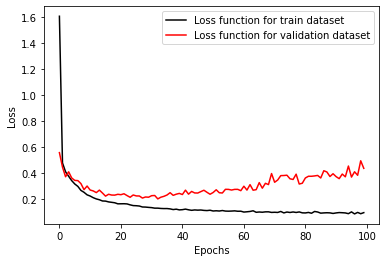

In [12]:
#Plotting the graph for train loss and validation loss
plt.plot(history.history['loss'], 'k-', label = 'Loss function for train dataset')
plt.plot(history.history['val_loss'], 'r-', label = 'Loss function for validation dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()